# Get Started

## Preliminary work

1. Load the eventstudy module and its dependencies: numpy and matplotlib:

In [19]:
import eventstudy as es
print(es.__version__)
from eventstudy import excelExporter

import numpy as np
import matplotlib.pyplot as plt

0.1a12


2. Set the parameters needed for your events: the returns and Fama-French factors (using es.import_returns()and es.import_FamaFrench()):

In [20]:
es.Single.import_returns('example/returns_GAFAM.csv')
es.Single.import_FamaFrench('example/famafrench.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'example/returns_GAFAM.csv'

## Example 1: A single event

As an introductory example, we will compute the event study analysis of the announcement of the first iphone, made by Steve Jobs during MacWorld exhibition, on January 7, 2007.

1. Run the event study, here using the Fama-French 3-factor model:

In [ ]:
source = [{
    "security_ticker": "AAPL",
    "market_ticker": 'SPY',
    "event_date": '2007-01-09',
},
{
    "security_ticker": "MSFT",
    "market_ticker": 'SPY',
    "event_date": '2007-01-09'
},
{
    "security_ticker": "AAPL",
    "market_ticker": 'SPY',
    "event_date": '2008-01-09'
}]


results = []
results_full = []


for item in source:
    event = es.Single.market_model(
        security_ticker = item['security_ticker'],
        market_ticker = item['market_ticker'],
        event_date = np.datetime64(item['event_date']),
        event_window = (-2,10), 
        estimation_size = 300,
        buffer_size = 30
    )
    
    results.append(event.results(asterisks=False).tail(1))
    results_full.append(event)
    

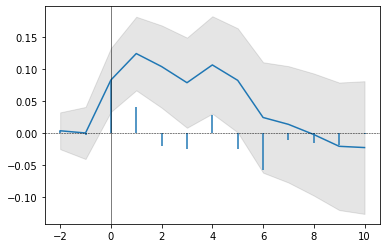

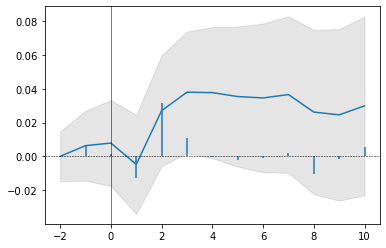

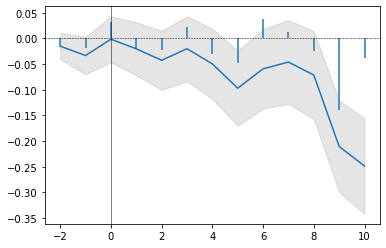

In [ ]:
for event in results_full:
    event.plot(AR=True)

2. Display results:
    - In a plot:
        - grey area: confidence interval (here at 90%)
        - blue line: CAAR
        - black bars: AR (displayed because AR parameter is set as True)

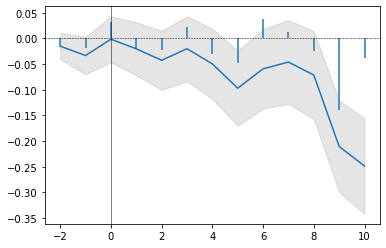

In [ ]:
event.plot(AR=True)
plt.show()

2. Or in a table:

In [ ]:
event.results(decimals=[3,5,3,5,2,2])

,AR,Std. E. AR,CAR,Std. E. CAR,T-stat,P-value
-2,-0.015,0.02014,-0.015,0.02014,-0.74,0.46
-1,-0.018,0.02014,-0.033,0.02849,-1.17,0.24
0,0.032,0.02014,-0.002,0.03489,-0.04,0.97
1,-0.019,0.02014,-0.02,0.04029,-0.50,0.62
2,-0.022,0.02014,-0.043,0.04505,-0.94,0.35
3,0.022,0.02014,-0.02,0.04934,-0.41,0.69
4,-0.029,0.02014,-0.049,0.05330,-0.93,0.35
5,-0.047,0.02014,-0.097 *,0.05698,-1.70,0.09
6,0.038,0.02014,-0.059,0.06043,-0.98,0.33
7,0.013,0.02014,-0.046,0.06370,-0.72,0.47


In [ ]:
event.to_excel('export.xlsx')

## Example 2: An  of events

The eventstudy package offer three different entry points. The list of events can be provided using a csv file, a plain python text or a python list.

In this second example, based on the same data and preliminary work, we will compute an event study on GAFA annual report (10-K form) releases.

### Data preparation

The first step is to gather the data about the events and to format it. For the purpose of this example we will use the csv file methods. The csv file must contains all information needed to compute the model.

The event study will be computed using the market model. According to the API documentation aside from event study parameters which will be set globally for all events (event_window, estimation_size and buffer_size), the market model needs the security_ticker, the market_ticker and the event_date parameters.

Thus, the csv file should contain three columns with the exact same names as the parameter names.

**Note:** The csv file must use comma (‘,’) as separator.

### Event study computation

To create an event study analysis of an aggregate of events, we will use the Multiple class. This class is designed following the same spirit and structure of the Single class.

Run the event study using the csv importer method:

In [22]:
release_10K = es.Multiple.from_csv(
    path = '10K.csv', # the path to the csv file created
    event_study_model = es.Single.market_model,
    event_window = (-5,+10),
    estimation_size = 200,
    buffer_size = 30,
    date_format = '%d/%m/%Y',
    ignore_errors = True
)

Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.


**Note:** The event_study_model parameter must point to a function. This function can either be a model function provided by the Single class or a user-defined function.

When the ignore_errors parameter is set to True (which is its default value), the event study analysis will be computed regardless of any error encounter. Event triggering an error will be remove of the sample. Use error_report method to get the full list of error and their explanation. Errors are often coming from data unavailability.

Set the ignore_errors to False if you prefer the analysis to stop at the first error.

In [23]:
print(release_10K.error_report())

Error Report

3 errors due to data unavailability.
The respective events was not processed and thus removed from the sample.
It does not affect the computation of other events.

Help 1: Check if the company was quoted at this date, 
Help 2: For event study modelised used Fama-French models,
        check if the Fama-French dataset imported is up-to-date.
Tips:   Re-import all parameters and re-run the event study analysis.

Details
(You can find more details on errors in the documentation.)

Error            Date                       Parameters                             
---------------- -------------------------- -----------------------------------------
DateMissingError 2020-02-04T00:00:00.000000 security_ticker: GOOG; market_ticker: SPY
Description: Date (2020-02-04T00:00:00.000000) is missing in parameter: returns.

DateMissingError 2020-01-31T00:00:00.000000 security_ticker: AMZN; market_ticker: SPY
Description: Date (2020-01-31T00:00:00.000000) is missing in parameter: returns

### Display results:
In a plot:

*grey area: confidence interval (here defined by the user at 95%); blue line: CAAR*

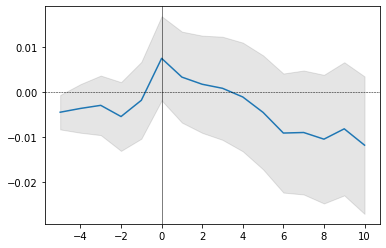

In [24]:
release_10K.plot(confidence=.95)
plt.show() # use standard matplotlib function to display the plot

Or in a table:

**Note:** Asterisks are added automatically to highlight the level of significance (Significance level: *** at 99%, ** at 95%, * at 90%). You can remove asterisks by setting asterisks parameter at False.

decimals is a list of integer setting for each column (except index) the rounding decimal. You can also set one integer (e.g. decimals = 3) if you want all columns to be rounded the same.

See the documentation on this results function for more details.

In [25]:
release_10K.results(decimals=[3,5,3,5,2,2])

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.004,0.00233,-0.004 *,0.00233,-1.93,0.05
-4,0.001,0.00233,-0.004,0.00329,-1.11,0.27
-3,0.001,0.00233,-0.003,0.00403,-0.73,0.46
-2,-0.002,0.00233,-0.005,0.00465,-1.17,0.24
-1,0.004,0.00233,-0.002,0.00520,-0.35,0.72
0,0.009,0.00233,0.008,0.00570,1.32,0.19
1,-0.004,0.00233,0.003,0.00615,0.54,0.59
2,-0.002,0.00233,0.002,0.00658,0.26,0.79
3,-0.001,0.00233,0.001,0.00698,0.12,0.90
4,-0.002,0.00233,-0.001,0.00735,-0.15,0.88


Get CAR distribution:

In [26]:
release_10K.get_CAR_dist(4)

,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.0045,0.0003,0.7574,-0.2714,-0.0466,-0.0109,-0.0048,0.0045,0.0372
-4,-0.0036,0.0006,-0.1199,-0.3267,-0.0600,-0.0147,0.0004,0.0069,0.0507
-3,-0.0030,0.0009,0.1443,-0.1972,-0.0843,-0.0229,-0.0047,0.0173,0.0617
-2,-0.0054,0.0007,-0.0016,0.2398,-0.0637,-0.0212,-0.0074,0.0064,0.0553
-1,-0.0018,0.0012,0.3359,0.4938,-0.0693,-0.0227,-0.0082,0.0139,0.0915
0,0.0075,0.0036,1.5656,1.1312,-0.1044,-0.0285,-0.0014,0.0253,0.2007
1,0.0033,0.0044,1.0385,1.0417,-0.1013,-0.0370,-0.0125,0.0236,0.2110
2,0.0017,0.0049,0.2146,0.9171,-0.0948,-0.0419,-0.0153,0.0323,0.1875
3,0.0008,0.0052,0.4870,0.9131,-0.1281,-0.0448,-0.0190,0.0296,0.1981
4,-0.0011,0.0051,0.6812,0.9303,-0.1233,-0.0410,-0.0192,0.0256,0.2090


## Bonus: Loop in event

The true strengh of this package is to use python. You can create complex algorithm to compute programatically event stuy analyses. From the same data as above, we will compute an event study of 10-K form releases for each company.

### Data preparation
This time, we will use the from_list method which set event list using a python list. This let the user manipulate the list of event before computing event studies. This list must contains all parameters needed to compute the selected model (here we will use the Fama-French 3-factor model). The Fama-French factors have to be set using the eventstudy.Single.import_FamaFrench method (see preliminary step).

In [ ]:
events_db = [
    {'security_ticker': 'AAPL', 'market_ticker': 'SPY', 'event_date': np.datetime64('2019-10-31')},
    {'security_ticker': 'AAPL', 'market_ticker': 'SPY', 'event_date': np.datetime64('2018-11-05')},
    {'security_ticker': 'AAPL', 'market_ticker': 'SPY', 'event_date': np.datetime64('2017-11-03')},
    {'security_ticker': 'AAPL', 'market_ticker': 'SPY', 'event_date': np.datetime64('2016-10-26')},
    {'security_ticker': 'AAPL', 'market_ticker': 'SPY', 'event_date': np.datetime64('2015-10-28')},
    {'security_ticker': 'AAPL', 'market_ticker': 'SPY', 'event_date': np.datetime64('2014-10-27')},
    {'security_ticker': 'AAPL', 'market_ticker': 'SPY', 'event_date': np.datetime64('2013-10-30')},
    {'security_ticker': 'AAPL', 'market_ticker': 'SPY', 'event_date': np.datetime64('2012-10-31')},
    {'security_ticker': 'AAPL', 'market_ticker': 'SPY', 'event_date': np.datetime64('2011-10-26')},
    {'security_ticker': 'AAPL', 'market_ticker': 'SPY', 'event_date': np.datetime64('2010-10-27')},
    {'security_ticker': 'GOOG', 'market_ticker': 'SPY', 'event_date': np.datetime64('2020-02-04')},
    {'security_ticker': 'GOOG', 'market_ticker': 'SPY', 'event_date': np.datetime64('2019-02-05')},
    {'security_ticker': 'GOOG', 'market_ticker': 'SPY', 'event_date': np.datetime64('2018-02-06')},
    {'security_ticker': 'GOOG', 'market_ticker': 'SPY', 'event_date': np.datetime64('2017-02-03')},
    {'security_ticker': 'GOOG', 'market_ticker': 'SPY', 'event_date': np.datetime64('2016-02-11')},
    {'security_ticker': 'FB', 'market_ticker': 'SPY', 'event_date': np.datetime64('2020-01-30')},
    {'security_ticker': 'FB', 'market_ticker': 'SPY', 'event_date': np.datetime64('2019-01-31')},
    {'security_ticker': 'FB', 'market_ticker': 'SPY', 'event_date': np.datetime64('2018-02-01')},
    {'security_ticker': 'FB', 'market_ticker': 'SPY', 'event_date': np.datetime64('2016-01-28')},
    {'security_ticker': 'FB', 'market_ticker': 'SPY', 'event_date': np.datetime64('2015-01-29')},
    {'security_ticker': 'FB', 'market_ticker': 'SPY', 'event_date': np.datetime64('2014-01-31')},
    {'security_ticker': 'AMZN', 'market_ticker': 'SPY', 'event_date': np.datetime64('2020-01-31')},
    {'security_ticker': 'AMZN', 'market_ticker': 'SPY', 'event_date': np.datetime64('2019-02-01')},
    {'security_ticker': 'AMZN', 'market_ticker': 'SPY', 'event_date': np.datetime64('2018-02-02')},
    {'security_ticker': 'AMZN', 'market_ticker': 'SPY', 'event_date': np.datetime64('2017-02-10')},
    {'security_ticker': 'AMZN', 'market_ticker': 'SPY', 'event_date': np.datetime64('2016-01-29')},
    {'security_ticker': 'AMZN', 'market_ticker': 'SPY', 'event_date': np.datetime64('2015-01-30')},
    {'security_ticker': 'AMZN', 'market_ticker': 'SPY', 'event_date': np.datetime64('2013-01-30')},
    {'security_ticker': 'AMZN', 'market_ticker': 'SPY', 'event_date': np.datetime64('2012-02-01')},
    {'security_ticker': 'AMZN', 'market_ticker': 'SPY', 'event_date': np.datetime64('2011-01-28')},
    {'security_ticker': 'AMZN', 'market_ticker': 'SPY', 'event_date': np.datetime64('2010-01-29')},
    {'security_ticker': 'MSFT', 'market_ticker': 'SPY', 'event_date': np.datetime64('2019-08-01')},
    {'security_ticker': 'MSFT', 'market_ticker': 'SPY', 'event_date': np.datetime64('2018-08-03')},
    {'security_ticker': 'MSFT', 'market_ticker': 'SPY', 'event_date': np.datetime64('2017-08-02')},
    {'security_ticker': 'MSFT', 'market_ticker': 'SPY', 'event_date': np.datetime64('2016-07-28')},
    {'security_ticker': 'MSFT', 'market_ticker': 'SPY', 'event_date': np.datetime64('2015-07-31')},
    {'security_ticker': 'MSFT', 'market_ticker': 'SPY', 'event_date': np.datetime64('2014-07-31')},
    {'security_ticker': 'MSFT', 'market_ticker': 'SPY', 'event_date': np.datetime64('2013-07-30')},
    {'security_ticker': 'MSFT', 'market_ticker': 'SPY', 'event_date': np.datetime64('2012-07-26')},
    {'security_ticker': 'MSFT', 'market_ticker': 'SPY', 'event_date': np.datetime64('2011-07-28')},
    {'security_ticker': 'MSFT', 'market_ticker': 'SPY', 'event_date': np.datetime64('2010-07-30')}
]

### Event studies computation
Using a list comprehension, the full list of events can be filtered to create one list per company’s ticker. Then we can compute for each company the event study using the Fama-French 3 factor model and store each event study in a releases dictionary.

In [ ]:
tickers = ['GOOG', 'AAPL', 'FB', 'AMZN', 'MSFT']
releases = dict()

for ticker in tickers:
    events = [event for event in events_db if event['security_ticker']==ticker]
    
    releases[ticker] = es.Multiple.from_list(
        events,
        es.Single.FamaFrench_3factor,
        event_window= (-5,+10)
    )

### Display results

In [ ]:
for ticker, event in releases.items():
    print(ticker)
    event.plot()
    plt.show()
    display(event.results())
    display(event.get_CAR_dist())